<a href="https://colab.research.google.com/github/jee365/ESAA/blob/main/ch4_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D_01~03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CH4. 합성곱 신경망(CNN)

## 01. 합성곱 신경망

합성곱 신경망(Convolutional Neural Network): 데이터가 가진 특징들의 패턴을 학습하는 알고리즘

ex) 이미지 분류, 객체 탐지, 스타일 전이

<이미지 분류>

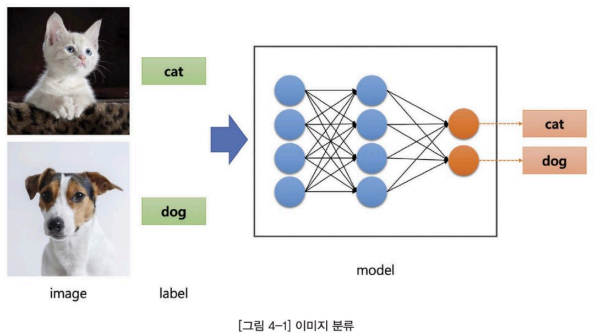

<객체 탐지>

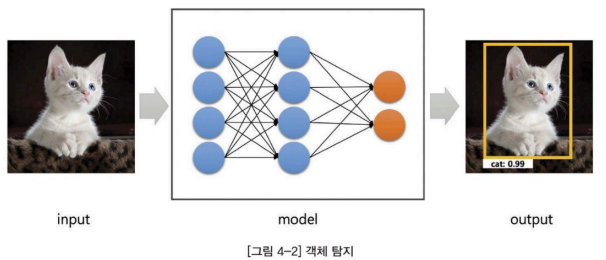

### 1-1 이미지 표현

- 이미지 또는 영상을 컴퓨터가 이해할 수 있으려면 0~255 사이의 숫자로 각 픽셀 화소값을 표현
- 컬러 이미지는 R, G, B 채널로 구성된 3장의 이미지를 겹쳐서 표현

### 1-2 합성곱

합성곱 연산: 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널을 사용하여 입력 이미지에 대한 특성을 추출하는 방법

특성맵: 합성곱 연산을 통해 추출된 이미지

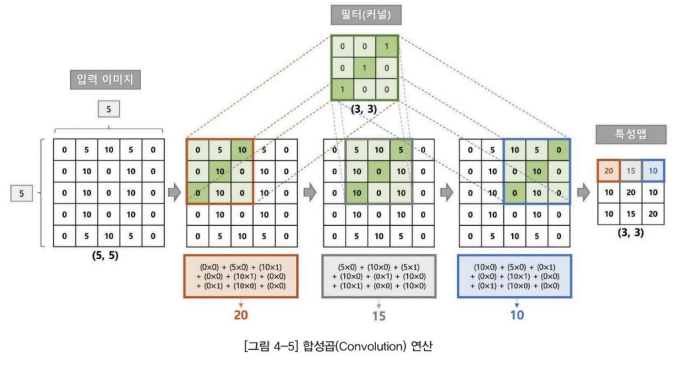

커널 사이즈가 3*3인 경우 총 9개의 가중치를 가지며 오차 역전파(back propagation) 시 커널의 가중치를 업데이트

공유 가중치: 오차 역전파 시 커널의 그래디언트를 계산할 때 9개에 대해서만 업데이트하면 되므로 완전 연결층을 사용할 때보다 연산량이 훨씬 적음

### 1-3 채널

채널: 입력 이미지를 구성하는 2차원 배열의 개수

ex) 컬러이미지: R,G,B 3장의 채널 이미지가 겹쳐서 표현됨

1. 입력 이미지의 채널 개수만큼 커널 생성
2. 각 채널마다 하나씩 커널을 적용하여 합성곱 연산 수행
3. 입력 이미지의 채널 개수만큼 합성곱 연산된 결과 생성
4. element-wise 덧셈 연산으로 모두 더해 최종 특성맵 생성

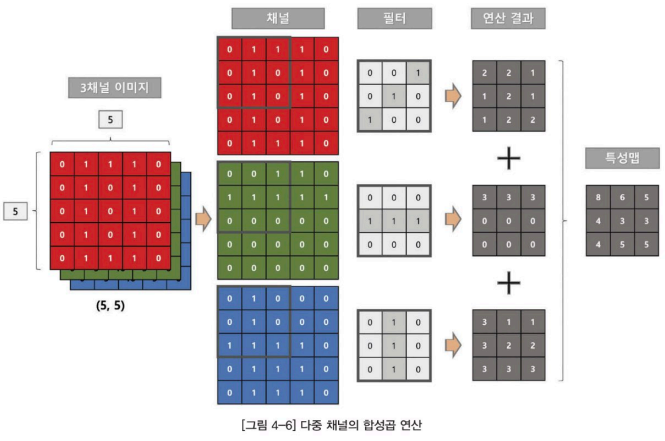

업데이트 할 파라미터 개수 = (3 x 3 x 입력 채널 수 x 출력 필터 수) + bias(20)

### 1-4 스트라이드(stride)

스트라이드: 합성곱 연산 수행 시 좌특 상단부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 수행, 이 때 이동 간격

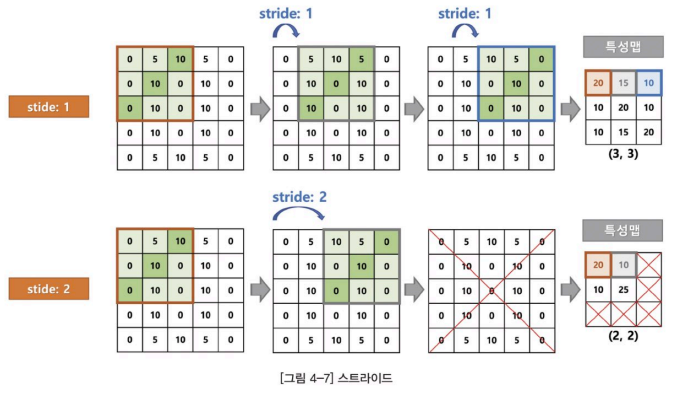

### 1-5 패딩(padding)

패딩: 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 하는 것

zero-padding: 입력 이미지의 가장 자리에 0으로 채워진 패딩 값으로 채운 후 추출

padding = 'same'이면 zero-padding, padding = 'valid'면 기본값

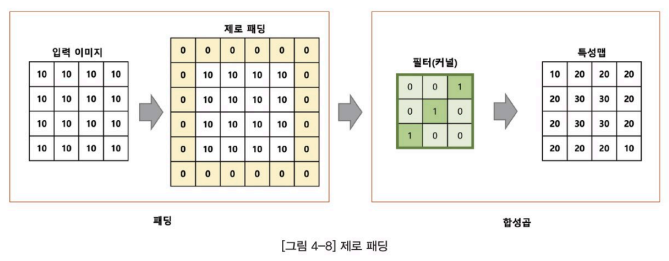

### 1-6 특성맵(feature map) 사이즈

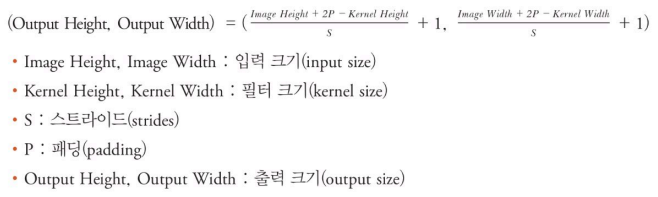

### 1-7 풀링(pooling)

풀링 레이어: 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어 -> 이미지 축소를 통해 연산량 감소, 과대적합 방지

- max pooling / average pooling

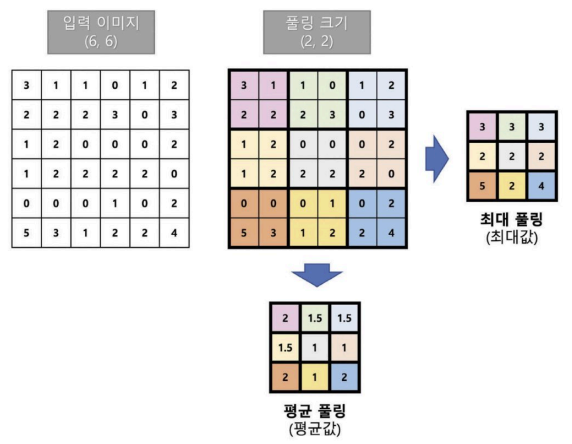

풀링 레이어 역시 스트라이드를 2로 설정하면 2칸씩 건너뛰면서 수행

## 02. 간단한 모델 생성

### 2-1 데이터 로드 및 전처리

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


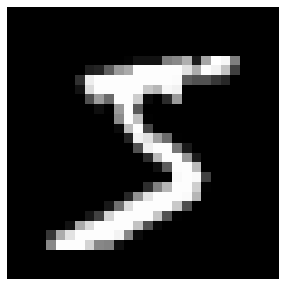

In [2]:
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap="gray")
  plt.axis("off")
  plt.show()

plot_image(x_train, 0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
x_train = x_train / x_train.max()
x_valid = x_valid / x_valid.max()

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [6]:
#채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2-2 Sequential API로 모델 생성 및 학습

합성곱 레이어 1개, 풀링 레이어 1개

합성곱 레이어: Conv2D, (3,3) 크기의 서로 다른 32가지 종류의 커널 적용

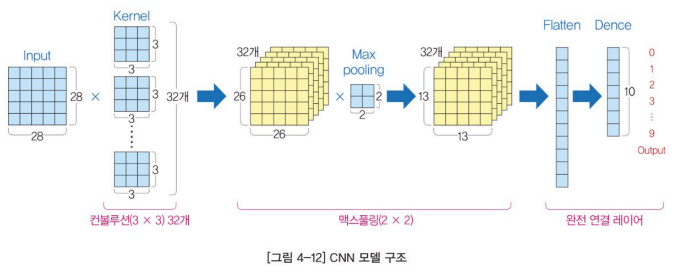

In [7]:
#Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
                             #Convolution 적용(32 filters)
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1), name='conv'),
                             tf.keras.layers.MaxPooling2D((2,2), name='pool'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
#모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
history = model.fit(x_train, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2090 - accuracy: 0.9407 - val_loss: 0.0870 - val_accuracy: 0.9733
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0771 - accuracy: 0.9777 - val_loss: 0.0704 - val_accuracy: 0.9769
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0603 - accuracy: 0.9815 - val_loss: 0.0586 - val_accuracy: 0.9802
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0501 - accuracy: 0.9846 - val_loss: 0.0648 - val_accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0432 - accuracy: 0.9868 - val_loss: 0.0514 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0367 - accuracy: 0.9890 - val_loss: 0.0555 - val_accuracy: 0.9816
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0317 - accuracy: 0.9905 - val_loss: 0.0500 -

In [9]:
model.evaluate(x_valid_in, y_valid) #4 epoch 이후부터 모델 과대적합

313/313 [==============================] - 2s 8ms/step - loss: 0.0552 - accuracy: 0.9831


[0.0551922470331192, 0.9830999970436096]

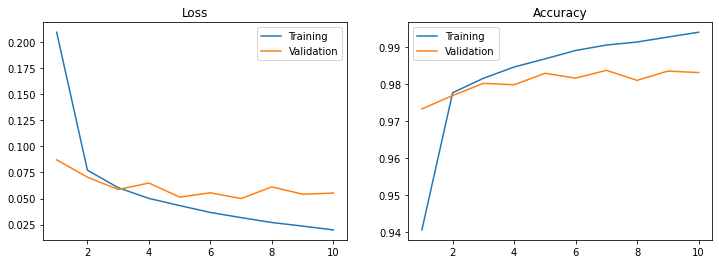

In [10]:
def plot_loss_acc(history, epoch):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1,2,figsize=(12,4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), acc, label='Training')
  axes[1].plot(range(1, epoch+1), val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

### 2-3 모델 구조 파악

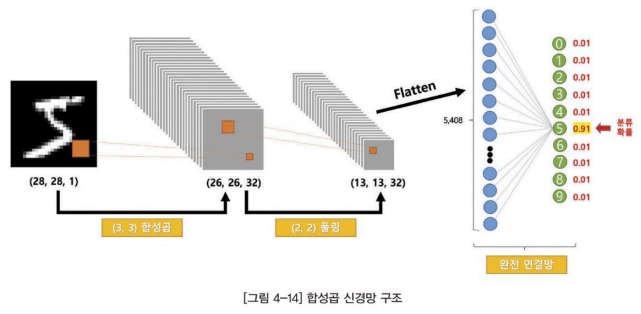

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [12]:
#입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [13]:
#출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [14]:
#레이어
model.layers

In [15]:
#첫번째 레이어 선택
model.layers[0]

In [16]:
#첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [17]:
#첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [19]:
#첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 3.48770082e-01,  3.52131426e-01, -8.60908091e-01,
            2.24065244e-01,  6.12149060e-01, -6.43401742e-01,
            9.59033966e-01, -2.41521552e-01,  2.00309858e-01,
            3.48186910e-01, -7.90226460e-01, -4.38546002e-01,
           -6.21675923e-02, -4.39521581e-01,  2.27758482e-01,
            4.75985259e-01,  5.03555536e-01, -7.34889328e-01,
           -1.33762741e+00, -5.24999462e-02,  1.60933256e-01,
           -2.34047711e-01, -2.74862528e-01, -2.06577122e-01,
           -8.35233986e-01,  1.61168978e-01, -3.23288798e-01,
           -9.61613894e-01, -6.83222294e-01,  2.00744703e-01,
           -1.99106708e-02, -7.74974167e-01]],
 
         [[ 9.75473523e-02,  3.17958832e-01, -1.11002183e+00,
           -4.87333834e-02,  7.08149433e-01, -3.20534455e-03,
           -7.11626112e-01,  1.19997621e-01,  7.09988713e-01,
            4.36702639e-01, -5.77655673e-01,  1.23229727e-01,
           

In [20]:
#첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 3.48770082e-01,  3.52131426e-01, -8.60908091e-01,
           2.24065244e-01,  6.12149060e-01, -6.43401742e-01,
           9.59033966e-01, -2.41521552e-01,  2.00309858e-01,
           3.48186910e-01, -7.90226460e-01, -4.38546002e-01,
          -6.21675923e-02, -4.39521581e-01,  2.27758482e-01,
           4.75985259e-01,  5.03555536e-01, -7.34889328e-01,
          -1.33762741e+00, -5.24999462e-02,  1.60933256e-01,
          -2.34047711e-01, -2.74862528e-01, -2.06577122e-01,
          -8.35233986e-01,  1.61168978e-01, -3.23288798e-01,
          -9.61613894e-01, -6.83222294e-01,  2.00744703e-01,
          -1.99106708e-02, -7.74974167e-01]],

        [[ 9.75473523e-02,  3.17958832e-01, -1.11002183e+00,
          -4.87333834e-02,  7.08149433e-01, -3.20534455e-03,
          -7.11626112e-01,  1.19997621e-01,  7.09988713e-01,
           4.36702639e-01, -5.77655673e-01,  1.23229727e-01,
           2.90283989e-02,  

In [21]:
#첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.30438405, -0.3977018 , -0.00608248, -0.2068276 ,  0.00872435,
       -0.0882856 , -0.00989383, -0.01299315, -0.07415309, -0.2480247 ,
       -0.0150037 , -0.16993405, -0.16394323, -0.35373098, -0.17835379,
       -0.4244605 , -0.15938215, -0.00499824,  0.19429031, -0.20184873,
       -0.27357733,  0.0063614 , -0.3350125 , -0.11191431, -0.00987136,
       -0.30297878, -0.1501604 , -0.0748327 , -0.19720404, -0.22039285,
       -0.2664712 , -0.02366246], dtype=float32)>

In [22]:
#레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [23]:
#샘플 이미지의 레이어별 출력을 리스트에 추가(첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

2

In [24]:
#첫번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

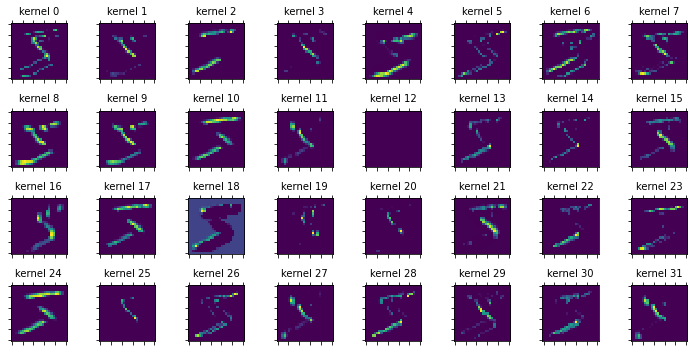

In [25]:
#Convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [26]:
#두번째 레이어(pool)출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


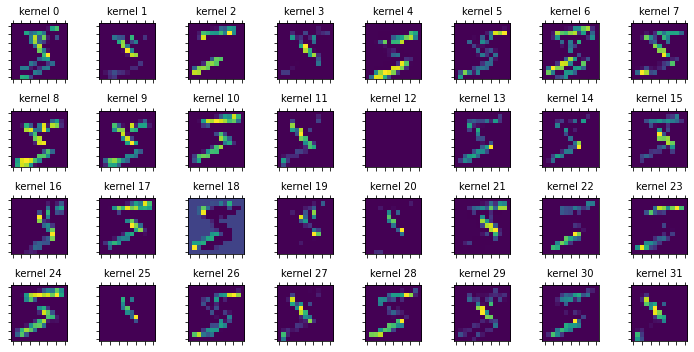

In [27]:
#시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

## 03. 복잡한 모델 생성

### 3-1 데이터셋 준비

In [28]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


y_train 값이 홀수면 1, 짝수면 0으로 하는 y_train_odd 배열 추가

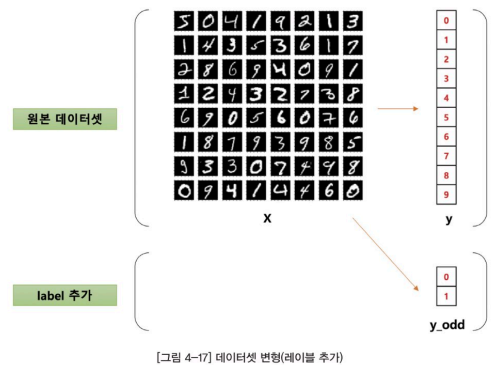

In [29]:
#새로운 출력 값 배열 생성
y_train_odd = []
for y in y_train:
  if y%2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [30]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [31]:
y_valid_odd = []
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape


(10000,)

In [32]:
x_train = x_train/255.0
x_valid = x_valid/255.0

#채널 추가
x_train_in = tf.expand_dims(x_train,-1)
x_valid_in = tf.expand_dims(x_valid,-1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3-2 Functional API로 다중 입력, 다중 출력 레이어 생성

In [33]:
inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32,(3,3),activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

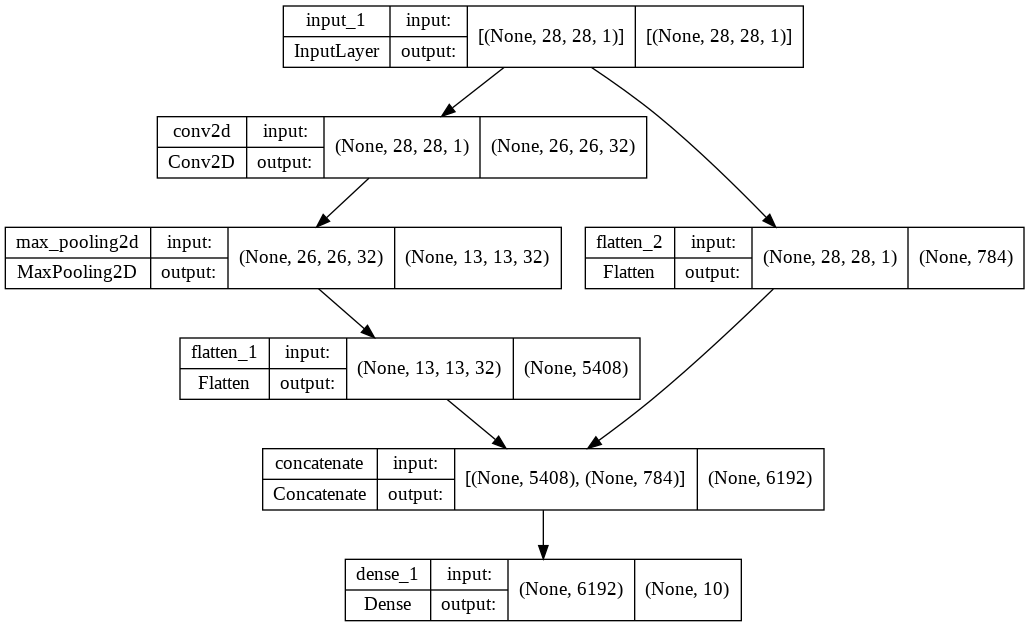

In [35]:
#모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [36]:
#모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

#모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2014 - accuracy: 0.9424 - val_loss: 0.0854 - val_accuracy: 0.9740
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0783 - accuracy: 0.9773 - val_loss: 0.0632 - val_accuracy: 0.9804
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0604 - accuracy: 0.9816 - val_loss: 0.0611 - val_accuracy: 0.9795
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0496 - accuracy: 0.9850 - val_loss: 0.0584 - val_accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0408 - accuracy: 0.9879 - val_loss: 0.0630 - val_accuracy: 0.9809
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0487 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0532 -

### 3-3 다중 출력 분류 모델

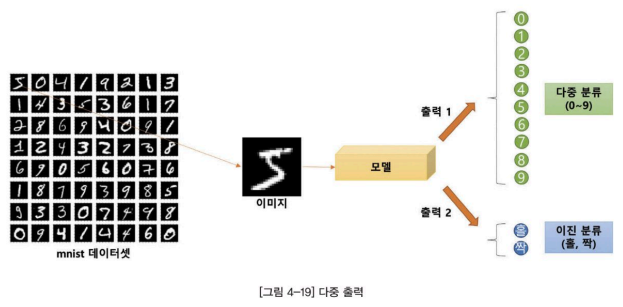

In [37]:
inputs = tf.keras.layers.Input(shape=(28,28,1),name='inputs')

conv = tf.keras.layers.Conv2D(32,(3,3),activation='relu',name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2),name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax',name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid',name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [38]:
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


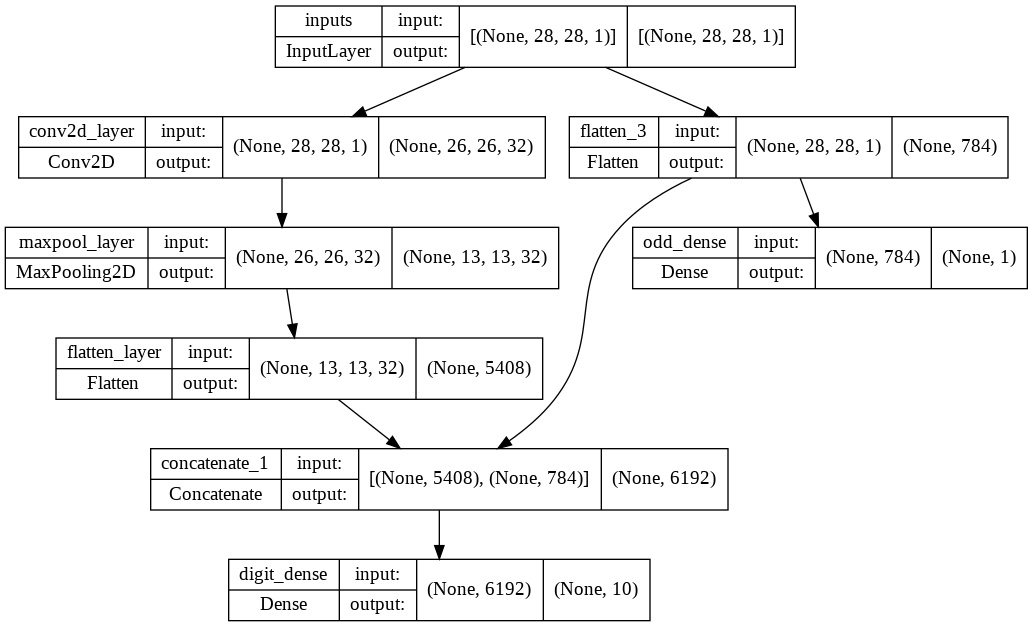

In [39]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [40]:
#모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'}, loss_weights = {'digit_dense':1, 'odd_dense':0.5}, metrics=['accuracy'])

#모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd}, 
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 54s 28ms/step - loss: 0.3631 - digit_dense_loss: 0.2008 - odd_dense_loss: 0.3246 - digit_dense_accuracy: 0.9431 - odd_dense_accuracy: 0.8664 - val_loss: 0.2202 - val_digit_dense_loss: 0.0812 - val_odd_dense_loss: 0.2780 - val_digit_dense_accuracy: 0.9751 - val_odd_dense_accuracy: 0.8905
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2123 - digit_dense_loss: 0.0765 - odd_dense_loss: 0.2715 - digit_dense_accuracy: 0.9780 - odd_dense_accuracy: 0.8918 - val_loss: 0.1896 - val_digit_dense_loss: 0.0580 - val_odd_dense_loss: 0.2631 - val_digit_dense_accuracy: 0.9819 - val_odd_dense_accuracy: 0.8984
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1894 - digit_dense_loss: 0.0578 - odd_dense_loss: 0.2631 - digit_dense_accuracy: 0.9832 - odd_dense_accuracy: 0.8961 - val_loss: 0.1858 - val_digit_dense_loss: 0.0564 - val_odd_dense_loss: 0.2587 - val_digit_dense_accuracy: 0.9821 -

In [41]:
#모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 3s 8ms/step - loss: 0.1902 - digit_dense_loss: 0.0624 - odd_dense_loss: 0.2555 - digit_dense_accuracy: 0.9816 - odd_dense_accuracy: 0.9013


[0.19020652770996094,
 0.062446363270282745,
 0.25552040338516235,
 0.9815999865531921,
 0.9013000130653381]

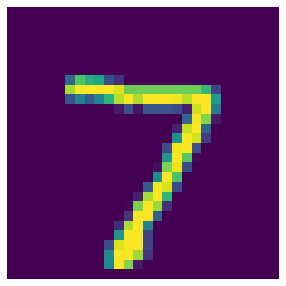

In [42]:
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis("off")
  plt.show()

plot_image(x_valid, 0)

In [43]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[2.6010858e-12 7.5849804e-10 1.2599432e-07 1.1368942e-06 3.8824057e-12
 1.3224378e-11 8.3094816e-20 9.9999869e-01 3.7457411e-09 4.5912865e-09]
[0.99953043]


In [44]:
digit_labels = np.argmax(digit_preds,axis=1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [45]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1,-1)[0]
odd_labels[0:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

### 3-4 전이 학습(Transfer Learning)

전이 학습: 앞서 훈련한 모델의 일부를 가져와서 그대로 사용하고, 최종 출력층만 새롭게 추가하여 모델을 재구성

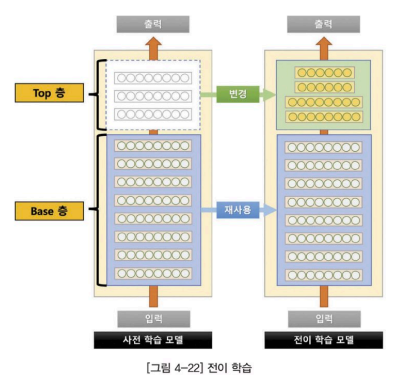

In [46]:
base_model_output = model.get_layer('flatten_layer').output

base_model = tf.keras.models.Model(inputs = model.input, outputs = base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


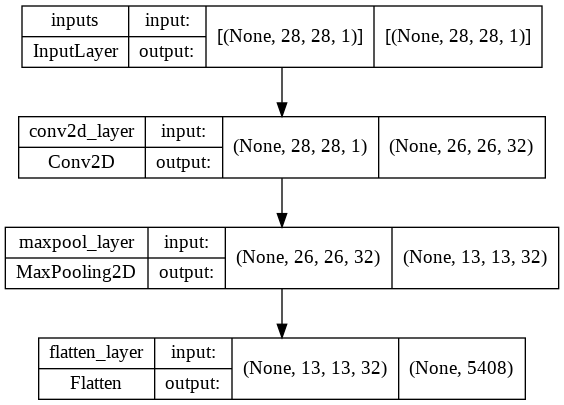

In [47]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [48]:
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


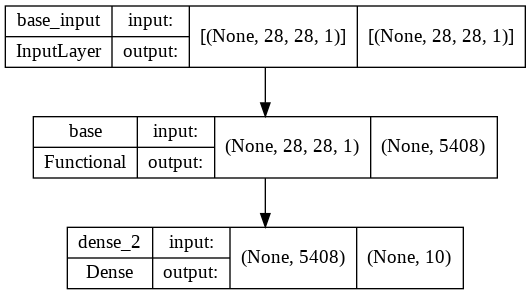

In [49]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [50]:
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = digit_model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1295 - accuracy: 0.9636 - val_loss: 0.0671 - val_accuracy: 0.9790
Epoch 2/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0568 - accuracy: 0.9833 - val_loss: 0.0536 - val_accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.0515 - val_accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0345 - accuracy: 0.9899 - val_loss: 0.0507 - val_accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0277 - accuracy: 0.9917 - val_loss: 0.0556 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.0556 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0573 -

In [51]:
#베이스 모델의 가중치 고정
base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [53]:
#Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)

digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [56]:
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0562 - val_accuracy: 0.9842
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.0612 - val_accuracy: 0.9828
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0144 - accuracy: 0.9959 - val_loss: 0.0541 - val_accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0117 - accuracy: 0.9966 - val_loss: 0.0570 - val_accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0104 - accuracy: 0.9970 - val_loss: 0.0609 - val_accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 0.0579 - val_accuracy: 0.9852
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.0645 - 

In [57]:
#베이스 모델의 Conv2D 레이어의 가중치만 고정
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [58]:
#Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)

digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [59]:
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1144 - accuracy: 0.9700 - val_loss: 0.0593 - val_accuracy: 0.9795
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0478 - accuracy: 0.9862 - val_loss: 0.0501 - val_accuracy: 0.9831
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0346 - accuracy: 0.9896 - val_loss: 0.0556 - val_accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0505 - val_accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0210 - accuracy: 0.9938 - val_loss: 0.0559 - val_accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.0582 - val_accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0139 - accuracy: 0.9959 - val_loss: 0.0559 - 